Given the initial energy, possible positions are: 0.46520000326042965 2.227947177299516


/var/folders/_c/8lshbw6n2pg5gc3cps5pfngw0000gp/T/ipykernel_27243/2219731622.py:38: RuntimeWarning: invalid value encountered in sqrt
  dxdt = np.sqrt(2*(E_total+De-De*(1-np.exp(-k*(r-re)))**2)/m)


<IPython.core.display.Javascript object>


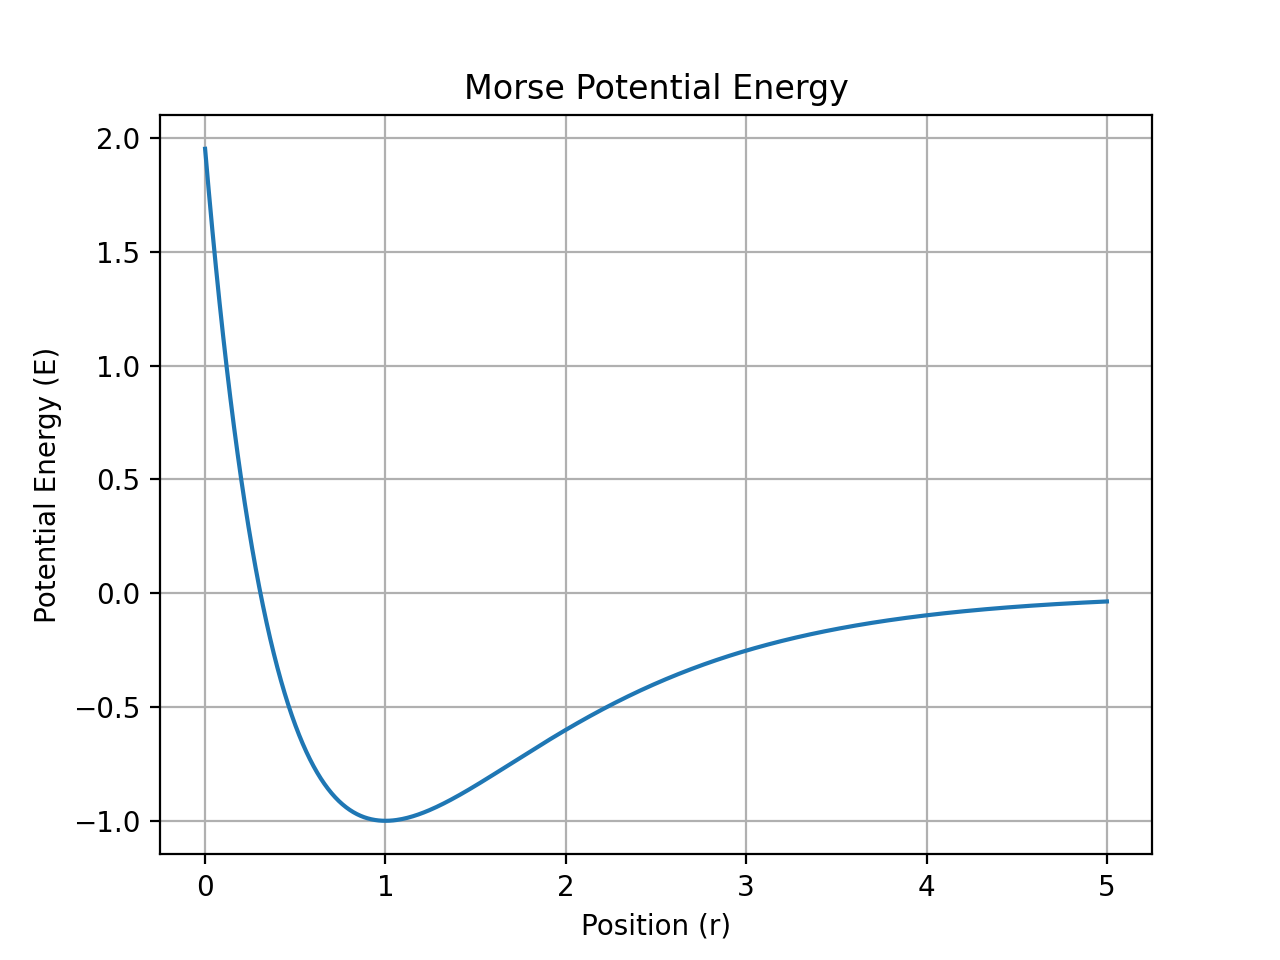

<IPython.core.display.Javascript object>


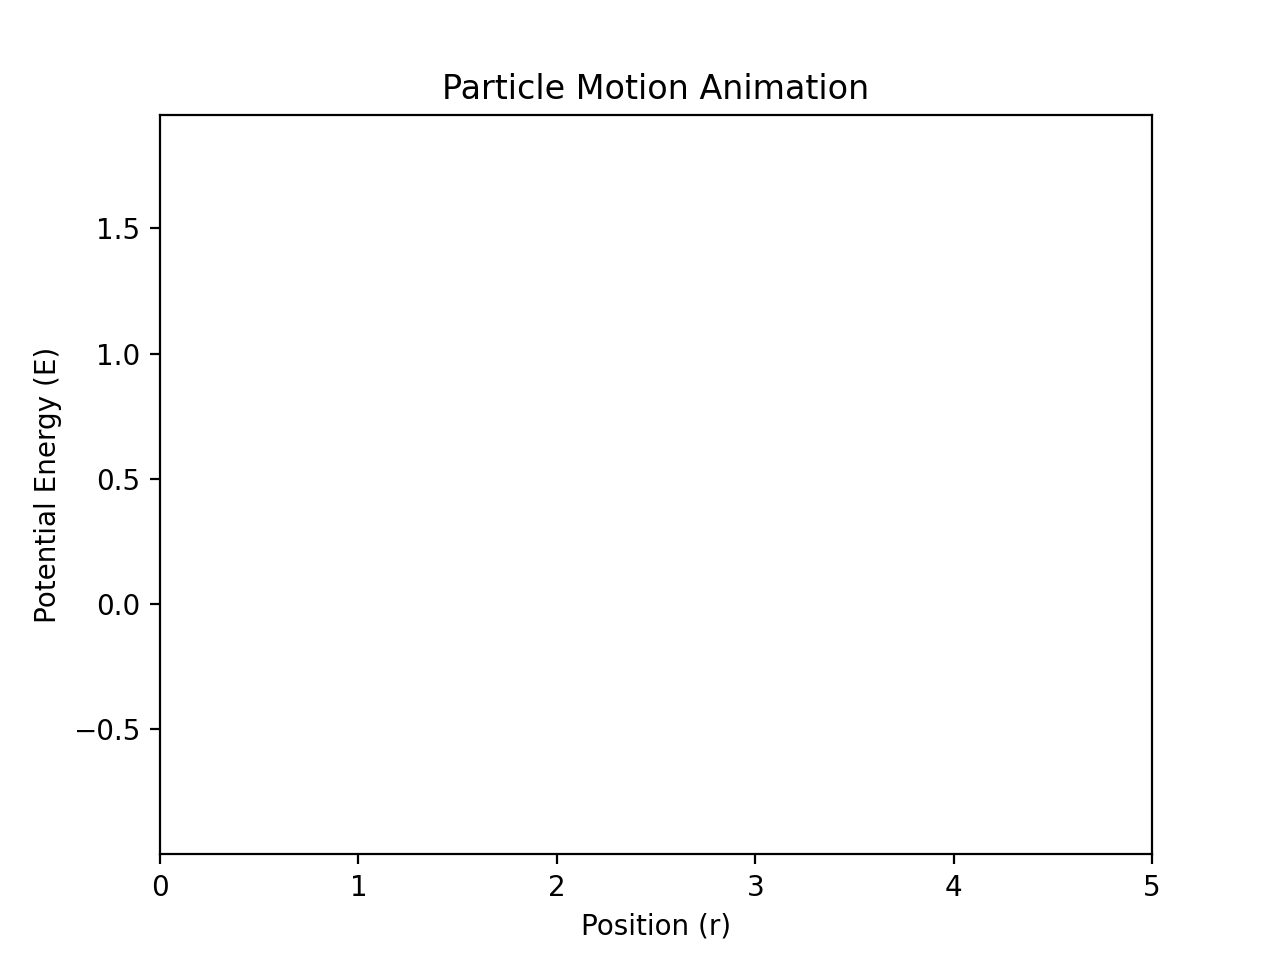

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

%matplotlib notebook

# Morse potential parameters
De = 1.0  # Depth of the energy well
k = 1.0   # Parameter "a" of the Morse potential
re = 1.0  # Equilibrium distance
m = 1.5   # Particle mass

# Get the initial energy from the user
E_total = -0.5
# float(input("Enter the initial energy: "))

# Calculate the initial position based on energy
r1 = re - (1/k)*np.log(1+np.sqrt((E_total+De)/De))
r2 = 1000*r1  # if "E_total> De": r2 will tend to infinity
if E_total <= 0:
    r2 = re - (1/k)*np.log(1-np.sqrt((E_total+De)/De))
    print('Given the initial energy, possible positions are:', r1, r2)
else:
    print('Given the initial energy, the initial position is:', r1)

# At t0 the initial velocity is zero
v0 = 0.0

def morse_potential(r):
    return -De + De*(1 - np.exp(-k*(r - re)))**2

# Force equation as a function of position (Newton's second law)
def force(r):
    return -2 * k * De * (1 - np.exp(-k * (r - re))) * np.exp(-k * (r - re))

# Equation of motion as a function of position (Newton's second law)
def dx_dt(r):
    dxdt = np.sqrt(2*(E_total+De-De*(1-np.exp(-k*(r-re)))**2)/m)
    return dxdt

# 4th order Runge-Kutta method to simulate the particle
def runge_kutta(h, N):
    r = r1
    v = v0
    t = 0.0
    
    r_list = [r]
    v_list = [v]
    t_list = [t]
    
    signo = 1
    
    for i in range(N):
        r_test = r + signo*10*h*dx_dt(r)
        if r_test >= r2:
            signo = signo*(-1)
            r = r2 - 0.00001
        elif r_test <= r1:
            signo = signo*(-1)
            r = r1 + 0.00001
        else:
            rk1 = dx_dt(r)
            rk2 = dx_dt(r+(h/2)*rk1)
            rk3 = dx_dt(r+(h/2)*rk2)
            rk4 = dx_dt(r+h*rk3)
            r = r + (1/6)*(rk1+2*rk2+2*rk3+rk4)*h*signo
        a = force(r)/m
        v = dx_dt(r)
        t = t + h
        r_list.append(r)
        v_list.append(v)
        t_list.append(t)
    
    return t_list, r_list, v_list

# Simulation parameters
h = 0.01  # Step size
N = 10000  # Number of steps

t, r, v = runge_kutta(h, N)

# Plot the potential energy as a function of position
r_values = np.linspace(0, 5.0, 500)
energy_values = morse_potential(r_values)

plt.plot(r_values, energy_values)
plt.xlabel('Position (r)')
plt.ylabel('Potential Energy (E)')
plt.title('Morse Potential Energy')
plt.grid(True)
plt.show()

# Animation

# Create a figure and axes for the animation
fig, ax = plt.subplots()
ax.set_xlim(0, 5.0)
ax.set_ylim(min(energy_values), max(energy_values))
ax.set_xlabel('Position (r)')
ax.set_ylabel('Potential Energy (E)')
ax.set_title('Particle Motion Animation')

# Line to represent the particle
particle_line, = ax.plot([], [], 'bo', markersize=8)

# Animation initialization function
def init():
    particle_line.set_data([], [])
    return particle_line,

# Animation update function
def animate(i):
    r_particle = r[i]  # Get the particle's position at step i
    particle_line.set_data([r_particle], [morse_potential(r_particle)])
    return particle_line,

# Create the animation
animation = FuncAnimation(fig, animate, init_func=init, frames=len(t), interval=10, blit=True)

# Show the animation in Jupyter Notebook
plt.show()
